In [258]:
import os 
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def get_files():
    path1 = glob.glob("ast/*.jpg")
    path2 = glob.glob("norm/*.jpg")
    path3 = glob.glob("kera/*.jpg")
    

    norm = []
    ast = []
    kera = []
    
    for filename in path1:
        im1 = cv2.imread(filename)
        Rim1 = cv2.resize(im1, (100, 100)) 
        img1 = cv2.cvtColor(Rim1, cv2.COLOR_BGR2GRAY)
        flag1, bImg1 = cv2.threshold(img1, 85, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
        ast.append(bImg1)
        
    for filename in path2:
        im2 = cv2.imread(filename)
        Rim2 = cv2.resize(im2, (100, 100))
        img2 = cv2.cvtColor(Rim2, cv2.COLOR_BGR2GRAY)
        flag1, bImg2 = cv2.threshold(img2, 85, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
        ret, mask1 = cv2.threshold(bImg2, 10, 255, cv2.THRESH_BINARY)
        mask1a = cv2.bitwise_not(mask1)
        norm.append(mask1a)
        
    for filename in path3:
        im3 = cv2.imread(filename)
        Rim3 = cv2.resize(im3, (100, 100))
        img3 = cv2.cvtColor(Rim3, cv2.COLOR_BGR2GRAY)
        flag1, bImg3 = cv2.threshold(img3, 85, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
        ret, mask2 = cv2.threshold(bImg3, 10, 255, cv2.THRESH_BINARY)
        mask2a = cv2.bitwise_not(mask2)
        kera.append(mask2a)
        
    return ast, norm, kera

x, y, z = get_files()
print("Files loaded")
print("*******\n")


def get_contours(x):
    contours = []
    for i in x:
        bim1, contours1, hierarchy1 = cv2.findContours(i,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        contours.append(contours1)
    return contours
    
xx = get_contours(x)
yy = get_contours(y)
zz = get_contours(z)
print("Contours Obtained")
print("*******\n")

def contours_to_points(contours, eye):
    points = []

    for i in contours:
        maxim =[0,0,0]
        for j in i:
            if cv2.contourArea(j) > maxim[0]:
                maxim = [cv2.contourArea(j), cv2.arcLength(j, True), eye]
        points.append(maxim)
    return points

xxx = contours_to_points(xx, 1)
yyy = contours_to_points(yy, 0)
zzz = contours_to_points(zz, 2)


print("\n")    
print("Obtained points to plot")
print("*******\n")

#All three comparisons

np_size = len(xxx) + len(yyy) + len(zzz)
np_array = np.zeros(shape = (np_size, 3))

i = 0
for p in xxx:
    np_array[i] = p
    i += 1
    
for p in yyy:
    np_array[i] = p
    i += 1

for p in zzz:
    np_array[i] = p
    i += 1

responses = np.zeros(shape=(i, 1))

i = 0

for x in xxx:
    responses[i] = 1
    i += 1
    
for y in yyy:
    responses[i] = 0
    i += 1

for z in zzz:
    responses[i] = 2
    i += 1
    
    
eye_data_x = np_array[:, 1:]
eye_data_y = np_array[:, 2]

X_train, X_test, y_train, y_test = train_test_split(eye_data_x, eye_data_y, test_size=0.33)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_predict = neigh.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_predict))   




Files loaded
*******

Contours Obtained
*******



Obtained points to plot
*******

accuracy: 0.636363636364


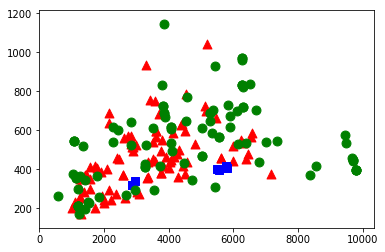

In [259]:
red = np_array[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')

blue = np_array[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')

green = np_array[responses.ravel()==2]
plt.scatter(green[:,0],green[:,1],80,'g','o')

plt.show()

In [262]:
#1 to 1 comparisons
#Compare Ast/Kera
#x = ast, z= kera

ast_kera_size = len(xxx) + len(zzz)
ast_kera_array = np.zeros(shape = (ast_kera_size, 3))

j = 0 

for p in xxx:
    ast_kera_array[j] = p
    j += 1
    
for p in zzz:
    ast_kera_array[j] = p
    j += 1

a_k_responses = np.zeros(shape=(j,1))

j = 0;

for x in xxx:
    a_k_responses[j] = 1
    j += 1
    
for z in zzz:
    a_k_responses[j] = 2
    j += 1

ak_eye_data_x = ast_kera_array[:, 1:]
ak_eye_data_y = ast_kera_array[:, 2]

ak_X_train, ak_X_test, ak_y_train, ak_y_test = train_test_split(ak_eye_data_x, ak_eye_data_y, test_size=0.33)
ak_neigh = KNeighborsClassifier(n_neighbors=3)
ak_neigh.fit(ak_X_train, ak_y_train)
ak_y_predict = ak_neigh.predict(ak_X_test)
print("accuracy of Astigmatism to Keratonocus:", accuracy_score(ak_y_test, ak_y_predict))

accuracy of Astigmatism to Keratonocus: 0.857142857143


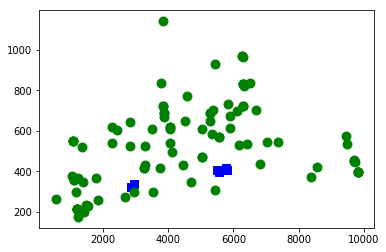

In [263]:
blue = ast_kera_array[a_k_responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')

green = ast_kera_array[a_k_responses.ravel()==2]
plt.scatter(green[:,0],green[:,1],80,'g','o')

plt.show()

In [308]:
#Compare kera/Norm
# z = kera, y = norm

norm_kera_size = len(yyy) + len(zzz)
norm_kera_array = np.zeros(shape = (norm_kera_size, 3))

k = 0 

for p in yyy:
    norm_kera_array[k] = p
    k += 1
    
for p in zzz:
    norm_kera_array[k] = p
    k += 1

n_k_responses = np.zeros(shape=(k,1))

k = 0;

for y in yyy:
    n_k_responses[k] = 0
    k += 1
    
for z in zzz:
    n_k_responses[k] = 2
    k += 1
    
nk_eye_data_x = norm_kera_array[:, 1:]
nk_eye_data_y = norm_kera_array[:, 2]

nk_X_train, nk_X_test, nk_y_train, nk_y_test = train_test_split(nk_eye_data_x, nk_eye_data_y, test_size=0.33)
nk_neigh = KNeighborsClassifier(n_neighbors=3)
nk_neigh.fit(nk_X_train, nk_y_train)
nk_y_predict = nk_neigh.predict(nk_X_test)
print("Accuracy of Normal/Keratonocus:", accuracy_score(nk_y_test, nk_y_predict))

Accuracy of Normal/Keratonocus: 0.52380952381


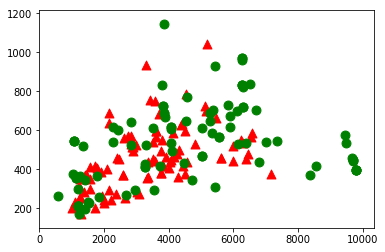

In [287]:
red = norm_kera_array[n_k_responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')

green = norm_kera_array[n_k_responses.ravel()==2]
plt.scatter(green[:,0],green[:,1],80,'g','o')

plt.show()

In [288]:
#compare Ast/Norm
#x = Ast / y = Norm
ast_norm_size = len(xxx) + len(yyy)
ast_norm_array = np.zeros(shape = (norm_kera_size, 3))

l = 0

ast_norm_size = len(xxx) + len(yyy)
ast_norm_array = np.zeros(shape=(ast_norm_size, 3))

for x in xxx:
    ast_norm_array[l] = x
    l += 1
    
for y in yyy:
    ast_norm_array[l] = y
    l += 1
    

n_a_responses = np.zeros(shape=(l, 1))
l = 0

for x in xxx:
    n_a_responses[l] = 1
    l += 1
    
for y in yyy:
    n_a_responses[l] = 0
    l += 1
    
na_eye_data_x = ast_norm_array[:, 1:]
na_eye_data_y = ast_norm_array[:, 2]

na_X_train, na_X_test, na_y_train, na_y_test = train_test_split(na_eye_data_x, na_eye_data_y, test_size=0.33)
na_neigh = KNeighborsClassifier(n_neighbors=3)
na_neigh.fit(na_X_train, na_y_train)
na_y_predict = na_neigh.predict(na_X_test)
print("Accuracy of Normal/Keratonocus:", accuracy_score(na_y_test, na_y_predict))



Accuracy of Normal/Keratonocus: 0.882352941176


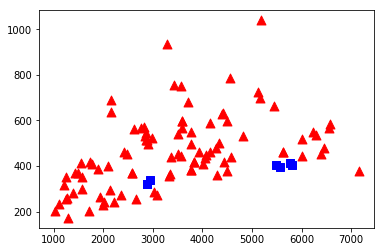

In [289]:
red = ast_norm_array[n_a_responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')

blue = ast_norm_array[n_a_responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')

plt.show()
